# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [75]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
print(api_key)

6b99895559d8b79e8973c1eefb287f8a


## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [67]:
#Constructing the url using the Openweather API format

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = url + "appid=" + api_key + "&units=" + units + "&q="
query_url 

'http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&q='

In [68]:
# #Making an API call to visualize API Type, Length and Structure
    
weather_output = requests.get(query_url + city).json()

print(f"Output Type: {type(weather_output)}")
print(f"Output Length: {len(weather_output)}")
print(f"{query_url}{city}")

Output Type: <class 'dict'>
Output Length: 13
http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&q=ishigaki


In [39]:
pprint(weather_output)

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 24.34, 'lon': 124.16},
 'dt': 1573948361,
 'id': 1861416,
 'main': {'humidity': 88,
          'pressure': 1015,
          'temp': 75.2,
          'temp_max': 75.2,
          'temp_min': 75.2},
 'name': 'Ishigaki',
 'sys': {'country': 'JP',
         'id': 8139,
         'sunrise': 1573941594,
         'sunset': 1573981003,
         'type': 1},
 'timezone': 32400,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 60, 'speed': 16.11}}


In [69]:
#To hold responses, setting up lists:

date = []
country = []
lon = []
lat = []
wind = []
cloudy = []
tempMax = []
humi = []

print("Beginning Data Retrieval")
print("-"*25)

#generating loop for cities and output
for city in cities:
# using Exceptions to run with out terminating
    try:
        weather_output = requests.get(query_url + city).json()
        tempMax.append(weather_output["main"]["temp_max"])
        date.append(weather_output['dt'])
        humi.append(weather_output['main']['humidity'])
        wind.append(weather_output['wind']['speed'])
        lat.append(weather_output['coord']['lat'])
        lon.append(weather_output['coord']['lon'])
        cloudy.append(weather_output['clouds']['all'])
        country.append(weather_output['sys']['country'])
          
# Print each city full url

        print(f"{query_url}{city}")

    except KeyError:
            print("N/A")
            continue
            
print("-"*25)
print("Data Retrieval Complete")
print("-"*25)

Beginning Data Retrieval
-------------------------
http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&q=mataura
http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&q=hailey
http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&q=punta arenas
N/A
http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&q=busselton
http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&q=ahipara
http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&q=tasiilaq
http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&q=vostochnyy
http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&q=yellowknife
N/A
http://api.openweathermap.org/data/2.5/

http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&q=goderich
http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&q=ancud
N/A
http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&q=ambilobe
http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&q=oktyabrskoye
http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&q=palmer
http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&q=vanimo
N/A
http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&q=vaini
http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&q=tuatapere
http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&

http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&q=filadelfia
http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&q=orange
http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&q=rincon
http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&q=morant bay
http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&q=saint-philippe
http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&q=moron
http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&q=nakhon thai
http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&q=ahuimanu
http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperi

http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&q=okhotsk
http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&q=erice
http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&q=marawi
http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&q=auras
http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&q=kaitangata
http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&q=meulaboh
http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&q=hellvik
N/A
http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&q=chimore
http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&q=coquim

http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&q=sorong
http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&q=roald
http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&q=trinidad
http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&q=geraldton
http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&q=laguna
http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&q=atar
http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&q=murgab
http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&q=luderitz
http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&q=antofagasta
h

http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&q=tessalit
http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&q=seeheim-jugenheim
http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&q=kavieng
N/A
http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&q=sungaipenuh
http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&q=alice springs
N/A
http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&q=rantepao
http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&q=blagoyevo
N/A
http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&q=antalaha
http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1

http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&q=carhuamayo
http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&q=naranjal
http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&q=avera
http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&q=shamary
http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&q=fairbanks
http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&q=viamao
http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&q=yarada
http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&q=dalby
http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&q=aitape
ht

N/A
http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&q=breves
http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&q=kolda
N/A
http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&q=vestmannaeyjar
http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&q=lichinga
http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&q=beidao
http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&q=port hardy
http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&q=sale
http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperial&q=carballo
http://api.openweathermap.org/data/2.5/weather?appid=6b99895559d8b79e8973c1eefb287f8a&units=imperia

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [71]:
# In order to generate the dataframe will need to account for All values (including null) in dictionary 

weather_dict = {
    "City": cities,
    "Cloudiness_%": cloudy,
    "Country": country,
    "Date": date,
    "Humidity_%": humi,
    "Lat": lat,
    "Lng": lon,
    "Max Temp_F": tempMax,
    "Wind Speed_mph": wind,
    
}
#generating UNFILTERED (UF) df
weather_df_UF = pd.DataFrame({ key:pd.Series(value) for key, value in weather_dict.items() })
weather_df_UF

,City,Cloudiness_%,Country,Date,Humidity_%,Lat,Lng,Max Temp_F,Wind Speed_mph
0,mataura,11.0,NZ,1.573955e+09,58.0,-46.19,168.86,59.00,8.01
1,hailey,5.0,US,1.573955e+09,41.0,43.52,-114.32,42.80,3.36
2,punta arenas,75.0,CL,1.573955e+09,66.0,-53.16,-70.91,48.20,25.28
3,olafsvik,0.0,AU,1.573955e+09,40.0,-33.64,115.35,80.01,11.39
4,busselton,9.0,NZ,1.573955e+09,91.0,-35.17,173.16,71.01,17.07
...,...,...,...,...,...,...,...,...,...
598,jibuti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
599,lima,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
600,tateyama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
601,poya,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
#Dropping null values from the dataframe
weather_df = weather_df_UF.dropna(how= "any")
weather_df.count()

City              537
Cloudiness_%      537
Country           537
Date              537
Humidity_%        537
Lat               537
Lng               537
Max Temp_F        537
Wind Speed_mph    537
dtype: int64

In [77]:
weather_df.head()
# Generating df output.csv file

output_file = os.path.join("City_df.csv")
weather_df.to_csv(output_file, index=False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

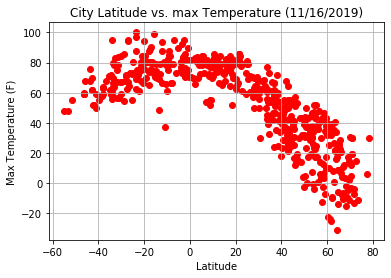

In [80]:
# Generate the Plot
plt.scatter(weather_df["Lat"],weather_df["Max Temp_F"],color="red",marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. max Temperature (11/16/2019)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# # Save the Figure
plt.savefig("../Images/Temperature.png")

# Show the Figure
plt.show()

#### Latitude vs. Humidity Plot

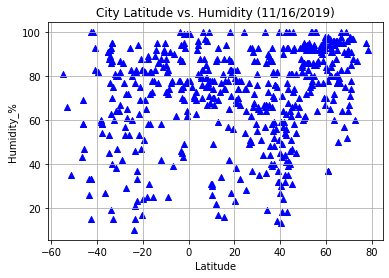

In [81]:
# Generate the Plot
plt.scatter(weather_df["Lat"],weather_df["Humidity_%"],color="blue",marker="^")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (11/16/2019)")
plt.ylabel("Humidity_%")
plt.xlabel("Latitude")
plt.grid(True)

# # Save the Figure
plt.savefig("../Images/Humidity.png")

# Show the Figure
plt.show()

#### Latitude vs. Cloudiness Plot

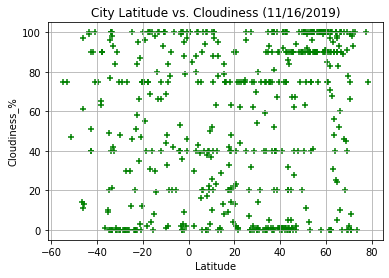

In [82]:
# Generate the Plot
plt.scatter(weather_df["Lat"],weather_df["Cloudiness_%"],color="green",marker="+")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (11/16/2019)")
plt.ylabel("Cloudiness_%")
plt.xlabel("Latitude")
plt.grid(True)

# # Save the Figure
plt.savefig("../Images/Cloudiness.png")

# Show the Figure
plt.show()

#### Latitude vs. Wind Speed Plot

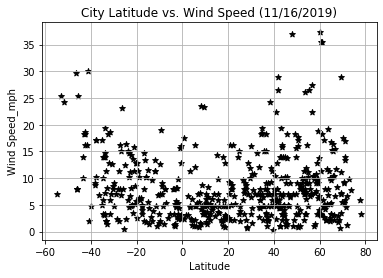

In [83]:
# Generate the Plot
plt.scatter(weather_df["Lat"],weather_df["Wind Speed_mph"],color="black",marker="*")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (11/16/2019)")
plt.ylabel("Wind Speed_mph")
plt.xlabel("Latitude")
plt.grid(True)

# # Save the Figure
plt.savefig("../Images/Wind.png")

# Show the Figure
plt.show()